# Multiple Logistic Regression in Python  - College Admission

### Overview
Predict college admission using Multiple Logistic Regression
 
### Builds on
None

### Run time
approx. 10-20 minutes

### Notes



## Step 1: College Admission Data

Let's look at the college admission data.  Here, we have some student test scores, GPA, and Rank, followed by whether the student was admitted or not.


| gre | gpa  | rank | admitted |
|-----|------|------|----------|
| 380 | 3.61 | 3    | no       |
| 660 | 3.67 | 1    | yes      |
| 800 | 4.0  | 1    | yes      |
| 640 | 3.19 | 4    | yes      |
| 520 | 2.93 | 4    | no       |
| 760 | 3.0  | 2    | yes      |

## Step 2 : Read Data

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [14]:
location = "/data/college-admissions/admission-data.csv"
location = 'https://s3.amazonaws.com/elephantscale-public/data/college-admissions/admission-data.csv'
admissions = pd.read_csv(location)
admissions.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,0,640,3.19,4
4,0,520,2.93,4


## Step 3: Split Data into training and Test

We will split our data into training and test so we can see how it performs.

In [15]:
from sklearn.model_selection import train_test_split

feature_vector = admissions[['gre', 'gpa', 'rank']]
# or
# feature_vector = admissions.drop('admit', axis=1) 

labels = admissions['admit']

print(feature_vector.head())
print()
print(labels.head())

   gre   gpa  rank
0  380  3.61     3
1  660  3.67     3
2  800  4.00     1
3  640  3.19     4
4  520  2.93     4

0    0
1    1
2    1
3    0
4    0
Name: admit, dtype: int64


In [16]:
## test_size = 20%  (0.2)
train_x, test_x, train_y, test_y = train_test_split(feature_vector, 
                                                    labels, test_size=0.2)
print("training set = " , train_x.shape)
print("testing set = " , test_x.shape)

training set =  (80, 3)
testing set =  (20, 3)


## Step 4: Run logistic regression

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# Fit the model
lrModel = lr.fit(train_x, train_y)

lrModel

/home/sujee/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Step 5: Evaluate Model

### 5.1 Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix

predictions = lrModel.predict(test_x)
cm = confusion_matrix(test_y, predictions)
cm

array([[8, 7],
       [2, 3]])

[]

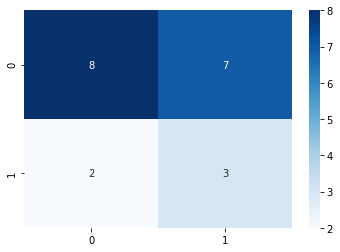

In [19]:
import seaborn as sns
import pandas as pd

cm_pd = pd.DataFrame(cm)
# cm_pd.set_index("admit", inplace=True)
# print(cm_pd)

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm_pd, annot=True, cmap="Blues").plot()

### 5.2 :  ROC Curve & AUC

In [20]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(test_y, predictions)
roc_auc = auc(fpr, tpr)
print("AUC : ", roc_auc)

AUC :  0.5666666666666667


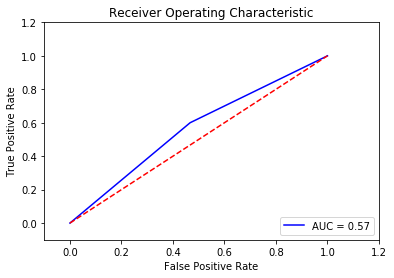

In [21]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Step 6: Predict on Test Data

**=>TODO: transform the test data**

In [22]:
## what is the name of test dataframe?
predictions = lrModel.predict(test_x)
predictions

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0])

## Step 7: Calcuate Accuracy on Test Data

**=>TODO: evaluate the predictions**

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, predictions)

0.55

## Step 8: Run some predictions on new data

Let's take some new data, and run predictions on that.

**=>TODO: transform the new data in order to get feature vectors**

In [24]:
newdata = pd.DataFrame({'gre' : [600, 700, 600], 
                        'gpa' : [4.0, 3.5, 3.2],
                        'rank': [1,   2,   3]}
             )
print(newdata)
# predictions = lrModel.predict(newdata)
# print(predictions)

newdata['prediction'] = lrModel.predict(newdata)
newdata

   gre  gpa  rank
0  600  4.0     1
1  700  3.5     2
2  600  3.2     3


,gre,gpa,rank,prediction
0,600,4.0,1,1
1,700,3.5,2,1
2,600,3.2,3,0
